# Лінійна регресія (Linear regression)

#### Регресійний аналіз із однією незалежною змінною

[Метод найменших квадратів](https://uk.wikipedia.org/wiki/Метод_найменших_квадратів) — метод знаходження наближеного розв'язку надлишково-визначеної системи. Часто застосовується в регресійному аналізі. На практиці найчастіше використовується лінійний метод найменших квадратів, що використовується у випадку системи лінійних рівнянь.

Нехай маємо лінійну регресію зі скалярною змінною x:

$$\displaystyle y=x\beta _{1}+\beta _{0},$$ 
а також вибірку початкових даних $\displaystyle (y_{i},x_{i})$ розміру $M \text(size)$. Тоді

$\displaystyle \beta _{0}={\frac {1}{M}}\sum _{i}y_{i}-{\frac {\beta _{1}}{M}}\sum _{i}x_{i}=\overline{y}-\overline{x}\cdot \beta _{1}, \hspace{10mm} \beta _{1}={\frac {M\sum _{i}x_{i}y_{i}-\sum _{i}x_{i}\sum _{i}y_{i}}{M\sum _{i}x_{i}^{2}-(\sum _{i}x_{i})^{2}}} = \frac{\text{size} \cdot \text{sum_xy - sum_x} \cdot \text{sum_y}}{\text{size} \cdot \text{sum_sqare_x} \cdot ({\text{sum_x})}^2}$

In [10]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import sympy
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from urllib.request import urlopen
from io import BytesIO
from IPython.core.display import display, HTML

In [11]:
def least_square_method(data_x,data_y):
    size = len(data_x);
    i = 0
    sum_xy = 0
    sum_y = 0
    sum_x = 0
    sum_sqare_x = 0
    while i < size:
        sum_xy += data_x[i]*data_y[i];
        sum_y += data_y[i]
        sum_x += data_x[i]
        sum_sqare_x += data_x[i]*data_x[i]
        i+=1
    average_x = sum_x / size
    average_y = sum_y / size
    k = (size * sum_xy - sum_x * sum_y) / (size * sum_sqare_x -sum_x * sum_x)
    b = average_y - average_x * k
    return k, b


x = [1, 2, 3, 4, 5, 6, 7];
y = [0.5, 2.5, 2, 4, 3.5, 6, 5.5]
      
k, b = least_square_method(x,y)

coef_k, Intercept_b = np.polyfit(x,y,1) # реалізація алгоритму через numpy

print(f'Алгоритм МНК за формулою: {k=:.4f}, {b=:.4f}')
print(f'Алгоритм бібліотеки numpy: {coef_k=:.4f}(коефіціент k), {Intercept_b=:.4f} (коефіціент b)')

Алгоритм МНК за формулою: k=0.8393, b=0.0714
Алгоритм бібліотеки numpy: coef_k=0.8393(коефіціент k), Intercept_b=0.0714 (коефіціент b)


In [12]:
# Пошук коефіцієнтів k b через похідну функції втрат MSE (градієнтним спуском)

sympy.init_printing(use_unicode=False, no_global=True)
# ініциалізація перемінних 'k, b'
k, b = sympy.symbols('k, b')
# створимо пусту функцію
f = 1

# до функції додамо квадрат заданої лінійної функції f(x) = kx + b ==> kx + b - f(x) = 0 або kx + b - y = 0
# в кожній із відомих точок x,y : ((X1 * k + b - Y1)**2 + ((X2 * k + b - Y2)**2 + ... + ((Xn * k + b - Yn)**2
for X, Y in zip(x,y):
    f += (k*X + b -Y)**2
# задамо функцію втрат MSE 
# MSE = 1 / n * ((X1 * k + b - Y1)**2 + ((X2 * k + b - Y2)**2 + ... + ((Xn * k + b - Yn)**2
MSE = 1/len(x)*(f)

# задамо початкові коефіцієнти 'k, b' для пошуку k, b' з мінімальним MSE
k_ = 0
b_ = 0

point = np.array([k_, b_]) # задамо початкову точку з коефіцієнтів k, b  для градієнтного спуску

# знайдемо похідні функції втрат MSE за коефіцієнтом k та b
MSEk = sympy.diff(MSE, k)
MSEb = sympy.diff(MSE, b)

m_se = 0
mse = MSE.subs({k: k_, b: b_}) # розрахуємо значення функції втрат в випадкових точках k_ та b_
while m_se!=mse:
    m_se = MSE.subs({k: k_, b: b_}) # значення MSE в розрахованих точках k_ та b_
    
    grd = (MSEk.subs({k: k_, b: b_}),MSEb.subs({k: k_, b: b_})) # градієнт
    step = 0.01 # крок для спуску
    vag =  np.array(grd)*-1*step # -1 отримаємо антиградієнт
    point = point+vag # отримаємо наступну точку з для пошуку k_ та b_ з меншою MSE
    
    k_ = point[0]
    b_ = point[1]
    mse = MSE.subs({k: k_, b: b_}) # розрахуємо значення функції втрат в розрахованих точках k_ та b_

print(f'{k_=:0.6f} {b_=:0.6f}')

k_=0.839286 b_=0.071429


In [13]:
# Method: Least Squares за допомогою бібліотеки statsmodels

d = {'x':x, "y":y}
df = pd.DataFrame.from_dict(d)
model = smf.ols('y~x',data=df)
fitted = model.fit()
result = fitted.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     32.97
Date:                Thu, 11 Aug 2022   Prob (F-statistic):            0.00225
Time:                        12:59:06   Log-Likelihood:                -6.9566
No. Observations:                   7   AIC:                             17.91
Df Residuals:                       5   BIC:                             17.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0714      0.654      0.109      0.9

<h1 style='text-align:center'>Опис до результатів регресійного аналізу</h1>
<h2 style='text-align:center'>OLS Regression Results</h2>
<div class="output_subarea output_html rendered_html" dir="auto"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>values</th>
      <th>explanation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Dep. Variable:</th>
      <td>y</td>
      <td>Виводить ім'я залежної змінної (y)</td>
    </tr>
    <tr>
      <th>Model:</th>
      <td>OLS</td>
      <td>Модель, що використовується в підгонці, модель МНК визначається за допомогою параметрів</td>
    </tr>
    <tr>
      <th>Method:</th>
      <td>Least Squares</td>
      <td>За яким методом розраховувалися параметри моделі</td>
    </tr>
    <tr>
      <th>Date:</th>
      <td>Wed, 03 Aug 2022</td>
      <td>Дата проведення регресійного аналізу</td>
    </tr>
    <tr>
      <th>Time:</th>
      <td>09:24:43</td>
      <td>Час проведення регресійного аналізу</td>
    </tr>
    <tr>
      <th>No. Observations:</th>
      <td>7</td>
      <td>Кількість зразків</td>
    </tr>
    <tr>
      <th>Df Residuals:</th>
      <td>5</td>
      <td>Ступені свободи залишків (рівняється різниці кількості спостережень та кількості параметрів</td>
    </tr>
    <tr>
      <th>Df Model:</th>
      <td>1</td>
      <td>Кількість параметрів у моделі (без урахування постійного члена, якщо він присутній) - відповідає кількості рядків в стовбчику coef (без Intercept)</td>
    </tr>
    <tr>
      <th>R-squared:</th>
      <td>0.868</td>
      <td>Коефіцієнт детермінації. Статистична міра того, наскільки добре лінія регресії наближається до реальних точок даних. $\text{R-squared} = correlation^2$ </td>
    </tr>
    <tr>
      <th>Adj. R-squared:</th>
      <td>0.842</td>
      <td>Вищевказане значення (R-squared) скориговано на основі кількості спостережень та ступенів свободи залишків.</td>
    </tr>
    <tr>
      <th>F-statistic:</th>
      <td>32.97</td>
      <td>Міра того, наскільки важлива підгонка. Середньоквадратична помилка моделі, поділена на середньоквадратичну помилку залишків.</td>
    </tr>
    <tr>
      <th>Prob (F-statistic):</th>
      <td>0.00225</td>
      <td>Імовірність того, що ви отримаєте вищезгадану статистику (F-statistic)</td>
    </tr>
    <tr>
      <th>Log-Likelihood:</th>
      <td>-6.9566</td>
      <td>Функція логарифмічної правдоподібності</td>
    </tr>
    <tr>
      <th>AIC:</th>
      <td>17.91</td>
      <td>Інформаційний критерій Акаіке. Регулює логарифмічну можливість залежно від кількості спостережень і складності моделі.</td>
    </tr>
    <tr>
      <th>BIC:</th>
      <td>17.81</td>
      <td>Байєсовський інформаційний критерій. Аналогічний AIC, але має більший штраф для моделей з великою кількістю параметрів.</td>
    </tr>
    <tr>
      <th>Covariance Type:</th>
      <td>nonrobust</td>
      <td>Вказує на стійкість до викидів ??????</td>
    </tr>
    <tr>
      <th>Omnibus:</th>
      <td>nan</td>
      <td>Тест Д Агостіно. Він забезпечує комбінований статистичний тест на наявність асиметрії (Skew) та ексцесу(Kurtosis).</td>
    </tr>
    <tr>
      <th>Prob(Omnibus):</th>
      <td>nan</td>
      <td>Ймовірність наведеної вище статистики</td>
    </tr>
    <tr>
      <th>Skew:</th>
      <td>0.258</td>
      <td>Міра симетрії даних щодо середнього. Нормально розподілені помилки мають бути симетрично розподілені щодо середнього (рівні суми вище та нижче лінії).</td>
    </tr>
    <tr>
      <th>Kurtosis:</th>
      <td>1.248</td>
      <td>Міра форми розподілу. Порівнює обсяг даних, близьких до середнього, з даними, далекими від середнього (у хвостах).</td>
    </tr>
    <tr>
      <th>Durbin-Watson:</th>
      <td>3.622</td>
      <td>Тест на наявність автокореляції (що помилки є незалежними). Часто важливий під час аналізу часових рядів.</td>
    </tr>
    <tr>
      <th>Jarque-Bera (JB):</th>
      <td>0.973</td>
      <td>Тест на асиметрію (Skew) та ексцес(Kurtosis)</td>
    </tr>
    <tr>
      <th>Prob(JB):</th>
      <td>0.615</td>
      <td>Ймовірність наведеної вище статистики (Jarque-Bera (JB))</td>
    </tr>
    <tr>
      <th>Cond. No.</th>
      <td>10.4</td>
      <td>Тест на мультиколлінеарність (при доборі кількох параметрів параметри пов'язані один з одним)</td>
    </tr>
  </tbody>
</table></div>

<div class="output_subarea output_html rendered_html" dir="auto"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>coef</th>
      <th>std err</th>
      <th>t</th>
      <th>P&gt;|t|</th>
      <th>[0.025</th>
      <th>0.975]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>explanation</th>
      <td>Розрахункове значення коефіцієнта</td>
      <td>Основна стандартна помилка оцінки коефіцієнта.</td>
      <td>Значення t-статистики. Це показник того, наскільки статистично значущим є коефіцієнт.</td>
      <td>P-значення, що підтверджує, що нульова гіпотеза у тому, що коефіцієнт = 0, правильна.</td>
      <td>Нижнє значення 95% довірчого інтервалу</td>
      <td>Верхнє значення 95% довірчого інтервалу</td>
    </tr>
  </tbody>
</table></div>

eval_env: 1


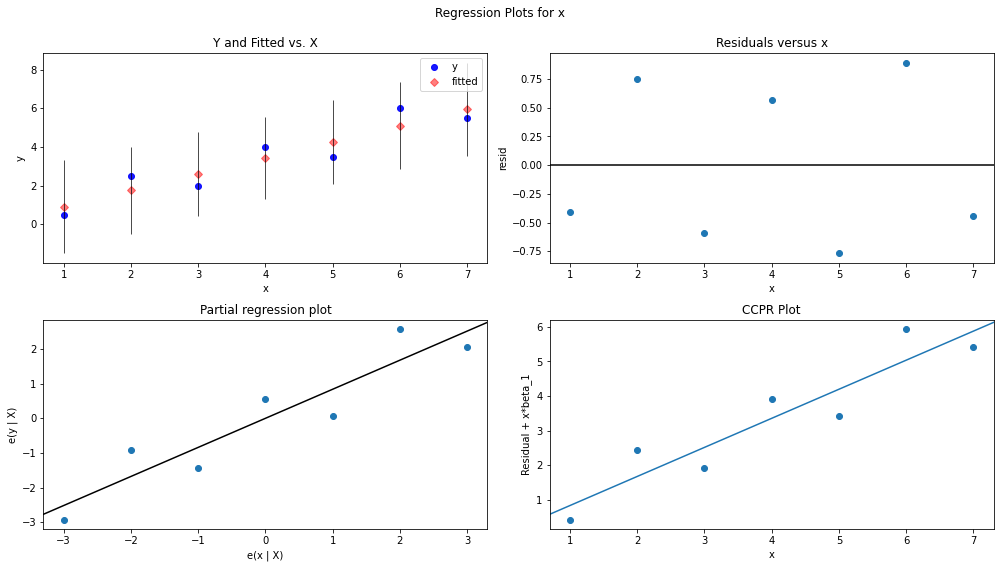

In [14]:
# creating regression plots
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(fitted,
                                    'x',
                                    fig=fig)

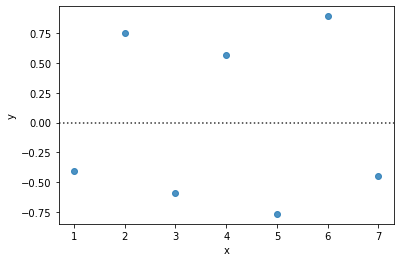

In [15]:
#residuals
  
sns.residplot(x='x', y='y', data=df)
plt.show()

Вилучаємо дані з результатів регресійного аналізу (statsmodels):

In [16]:
dfs = {}

for item in result.tables[0].data:
    dfs[item[0].strip()] = item[1].strip()
    dfs[item[2].strip()] = item[3].strip()
for item in result.tables[2].data:
    dfs[item[0].strip()] = item[1].strip()
    dfs[item[2].strip()] = item[3].strip()

Додаємо пояснення до таблиці:

In [17]:
df = pd.Series(dfs).to_frame()

l = ['Dep. Variable:', 'Model:','Method:','Date:','Time:','No. Observations:','Df Residuals:',
     'Df Model:','R-squared:',  'Adj. R-squared:', 'F-statistic:','Prob (F-statistic):',
     'Log-Likelihood:',  'AIC:',  'BIC:',   'Covariance Type:', 'Omnibus:', 'Prob(Omnibus):',
     'Skew:',  'Kurtosis:','Durbin-Watson:','Jarque-Bera (JB):','Prob(JB):','Cond. No.']
df = df.T[l].T
df.columns = ['values']
df['explanation'] = None

df['explanation']['Dep. Variable:'] = "Виводить ім'я залежної змінної (y)"
df['explanation']['Model:'] = "Модель, що використовується в підгонці, модель МНК визначається за допомогою параметрів"
df['explanation']['Method:'] = "За яким методом розраховувалися параметри моделі"
df['explanation']['Date:'] = "Дата проведення регресійного аналізу"
df['explanation']['Time:'] = "Час проведення регресійного аналізу"
df['explanation']['No. Observations:'] = "Кількість зразків"
df['explanation']['Df Residuals:'] = "Ступені свободи залишків (рівняється різниці кількості спостережень та кількості параметрів" 
df['explanation']['Df Model:'] = "Кількість параметрів у моделі (без урахування постійного члена, якщо він присутній) - відповідає кількості рядків в стовбчику coef (без Intercept)"
# df['Covariance Type:'] = "Вказує на стійкість до викидів" #??????
df['explanation']['R-squared:'] = "Коефіцієнт детермінації. Статистична міра того, наскільки добре лінія регресії наближається до реальних точок даних."
df['explanation']['Adj. R-squared:'] = "Вищевказане значення (R-squared) скориговано на основі кількості спостережень та ступенів свободи залишків."
df['explanation']['F-statistic:'] = "Міра того, наскільки важлива підгонка. Середньоквадратична помилка моделі, поділена на середньоквадратичну помилку залишків."
df['explanation']['Prob (F-statistic):'] = "Імовірність того, що ви отримаєте вищезгадану статистику (F-statistic)"
df['explanation']['Log-Likelihood:'] = "Функція логарифмічної правдоподібності"
df['explanation']['AIC:'] = "Інформаційний критерій Акаіке. Регулює логарифмічну можливість залежно від кількості спостережень і складності моделі."
df['explanation']['BIC:'] = "Байєсовський інформаційний критерій. Аналогічний AIC, але має більший штраф для моделей з великою кількістю параметрів."
df['explanation']['Omnibus:'] = "Тест Д Агостіно. Він забезпечує комбінований статистичний тест на наявність асиметрії (Skew) та ексцесу(Kurtosis)."
df['explanation']['Prob(Omnibus):'] = "Ймовірність наведеної вище статистики"
df['explanation']['Skew:'] = "Міра симетрії даних щодо середнього. Нормально розподілені помилки мають бути симетрично розподілені щодо середнього (рівні суми вище та нижче лінії)."
df['explanation']['Kurtosis:'] = "Міра форми розподілу. Порівнює обсяг даних, близьких до середнього, з даними, далекими від середнього (у хвостах)."
df['explanation']['Durbin-Watson:'] = "Тест на наявність автокореляції (що помилки є незалежними). Часто важливий під час аналізу часових рядів."
df['explanation']['Jarque-Bera (JB):'] = "Тест на асиметрію (Skew) та ексцес(Kurtosis)"
df['explanation']['Prob(JB):'] = "Ймовірність наведеної вище статистики (Jarque-Bera (JB))"
df['explanation']['Cond. No.'] = "Тест на мультиколлінеарність (при доборі кількох параметрів параметри пов'язані один з одним)"
# html = df.to_html()
# display(HTML(html))

In [18]:
df_continue = pd.DataFrame(columns=['coef','std err','t','P>|t|', '[0.025', '0.975]'], index=['explanation'])

df_continue['coef']['explanation'] = "Розрахункове значення коефіцієнта"
df_continue['std err']['explanation'] = "Основна стандартна помилка оцінки коефіцієнта."
df_continue['t']['explanation'] = "Значення t-статистики. Це показник того, наскільки статистично значущим є коефіцієнт."
df_continue['P>|t|']['explanation'] = "P-значення, що підтверджує, що нульова гіпотеза у тому, що коефіцієнт = 0, правильна."
df_continue['[0.025']['explanation'] = "Нижнє значення 95% довірчого інтервалу"
df_continue['0.975]']['explanation'] = "Верхнє значення 95% довірчого інтервалу"

# html_continue = df_continue.to_html()
# display(HTML(html_continue))

<h1>Регресійний аналіз із кількома незалежними змінними</h1>

In [19]:
URL = "https://stepik.org/media/attachments/lesson/8086/states.csv"
states = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

In [20]:
states.columns # Out: ['state', 'metro_res', 'white', 'hs_grad', 'poverty', 'female_house']

Index(['state', 'metro_res', 'white', 'hs_grad', 'poverty', 'female_house'], dtype='object')

In [21]:
models = smf.ols('poverty ~ metro_res + white + hs_grad + female_house',data=states)
fitteds = models.fit()
results = fitteds.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           8.88e-10
Time:                        12:59:08   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280   

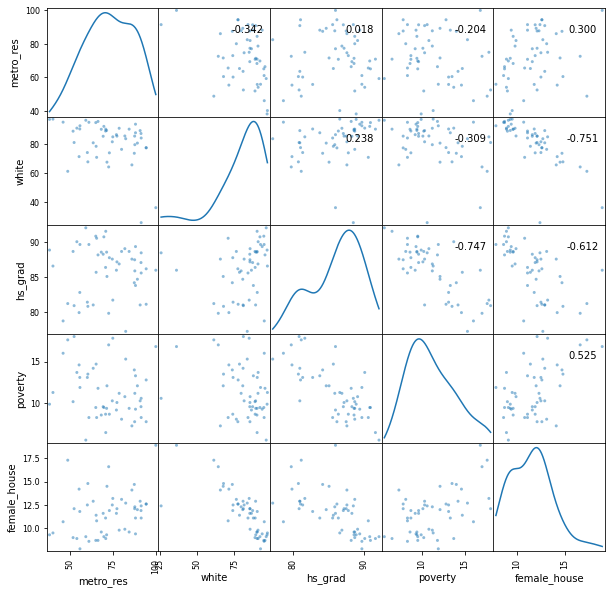

In [22]:
axes = pd.plotting.scatter_matrix(states, figsize=(10,10), diagonal='kde', grid=True)
corr = states.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [23]:
# Знайдемо такий набір фіч, де R-squared максимальна
feats = {'metro_res', 'white', 'hs_grad', 'female_house'}

# Рекурсивно переберемо всі поєднання змінних
def brute_force(params: set, formula: str, result: set) -> str:
    if not params:
        result.add(formula.lstrip('+ '))
        return 
    else:
        new_params = params.copy()
        for el in params:
            new_params.remove(el)

            brute_force(new_params, formula + ' + ' + el, result)
            brute_force(new_params, formula, result)

res = set()          
brute_force(feats, '', res)
res.remove('')
results = {}

# Порахуємо Adjusted R-Square для кожного поєднання
for formula in res:
    lm = smf.ols(formula='poverty ~ ' + formula, data=states).fit()
    results[formula] = f'{lm.rsquared_adj:.2}'
    
# виведемо відсортовані результати
d = sorted(results.items(), key=lambda x: x[1], reverse=True)
for i in d:
    print(i[1],'\t',i[0])


0.62 	 white + hs_grad + metro_res
0.61 	 white + female_house + hs_grad + metro_res
0.6 	 female_house + hs_grad + metro_res
0.58 	 hs_grad + metro_res
0.56 	 white + hs_grad
0.55 	 white + female_house + hs_grad
0.55 	 female_house + hs_grad
0.55 	 hs_grad
0.4 	 female_house + metro_res
0.39 	 white + female_house + metro_res
0.26 	 female_house
0.26 	 white + female_house
0.17 	 white + metro_res
0.077 	 white
0.022 	 metro_res


In [24]:
# Відбір змінних у моделях лінійної регресії
#https://loginom.ru/blog/feature-selection
#https://www.geeksforgeeks.org/ml-multiple-linear-regression-backward-elimination-technique/
#https://www.kaggle.com/code/hitesh19/multi-linear-regression-with-backward-elimination/notebook

# Завдання
Вам дано два ряди. В одному ряду значення курсу валюти за певний проміжок часу, у другому ряду знаходиться передбачений деякою моделлю курс цієї валюти. По двох рядах визначте помилку передбачення MSE<br>

$$\normalsize MSE =\frac{1}{n}\sum_{n}^{i=1}(y_{i} - f(x_{i}))^{2}$$

In [25]:

url_y = 'https://github.com/bykov-alexei/data-science-course/blob/master/ML/first-series.npy?raw=true'
url_x = 'https://github.com/bykov-alexei/data-science-course/blob/master/ML/second-series.npy?raw=true'
arr_x, arr_y = [np.load(BytesIO(urlopen(url).read())) for url in (url_x, url_y)]
MSE = sum((arr_y - arr_x)**2)/len(arr_y)
print(f'{MSE=}')

MSE=489.16182735045805


In [26]:

MSE = mean_squared_error(arr_x, arr_y) 
print(f'{MSE=}')

MSE=489.1618273504579


# Завдання
Вам дано два ряди. В одному ряду значення курсу валюти за певний проміжок часу, у другому ряду знаходиться передбачений деякою моделлю курс цієї валюти. По двох рядах визначте помилку передбачення RMSE

$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{n}^{i=1}(y_{i} - f(x_{i}))^{2}} $$

In [27]:
RMSE = MSE**0.5
print(f'{RMSE=}')

RMSE=22.117003127694716


In [28]:
RMSE = mean_squared_error(arr_x, arr_y, squared=False)
print(f'{RMSE=}')

RMSE=22.117003127694716


# Завдання
Вам дано два ряди. В одному ряду значення курсу валюти за певний проміжок часу, у другому ряду знаходиться передбачений деякою моделлю курс цієї валюти. По двох рядах визначте помилку передбачення MAE

$$\displaystyle \mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}}={\frac {\sum _{i=1}^{n}\left|e_{i}\right|}{n}}.$$

In [29]:
MAE = sum(abs(arr_y - arr_x))/len(arr_y)
print(f'{MAE=}')

MAE=17.996466944603252


In [30]:

MAE = mean_absolute_error(arr_x, arr_y)
print(f'{MAE=}')

MAE=17.996466944603256


In [31]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))
MAE = mae(arr_y, arr_x)
print(f'{MAE=}')

MAE=17.996466944603256


In [32]:
MAE = np.sum(abs(arr_y - arr_x))/len(arr_x)
print(f'{MAE=}')

MAE=17.996466944603256


# Завдання
Побудуйте лінійну регресію за даними і у відповідь запишіть коефіцієнт, що вийшов k

In [33]:
url = 'https://github.com/bykov-alexei/data-science-course/blob/master/ML/data.npz?raw=true'
load = BytesIO(urlopen(url).read())
npz = np.load(load)
df= pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, orient='columns')

In [34]:
model = smf.ols('prices~years',data=df)
fitted = model.fit()
k = fitted.params[1]
print(f'{k=}')

k=2.347042281992799


In [35]:
years, prices = (npz[x] for x in npz)
k = sum((years - years.mean()) * (prices - prices.mean())) / sum((years - years.mean())**2)
print(f'{k=}')

k=2.3470422819942174


# Завдання регресії. Лінійна регресія не для kx+b

# Завдання
У файлі наведено значення x, y

$y=a_1 \cdot sin(x)+a_2 \cdot cos(x) + a_3$

Ваше завдання знайти коефіцієнти $a_1, a_2, a_3$ округлити їх до найближчого цілого та записати через пробіл

In [36]:
url = 'https://github.com/bykov-alexei/data-science-course/blob/master/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/data.npz?raw=true'
from urllib.request import urlopen
from io import BytesIO
import pandas as pd
import statsmodels.formula.api as smf

load = BytesIO(urlopen(url).read())
npz = np.load(load)
df= pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, orient='columns')

# OLS - for "ordinary least squares" ЗВИЧАЙНІ НАЙМЕНШІ КВАДРАТИ метод
model = smf.ols('y~ np.sin(x) + np.cos(x)',data=df)
a3, a1, a2 = model.fit().params
print(f'{a1=:0.5f}  {a2=:0.5f}  {a3=:0.5f}')

a1=1.99151  a2=2.03124  a3=2.99889


In [37]:
print(model.fit().params)

Intercept    2.998885
np.sin(x)    1.991507
np.cos(x)    2.031243
dtype: float64


# Завдання
У файлі надано значення x, y<br>
$y=a_1 \cdot sin(x) + a_2 \cdot x + a_3 \cdot x^2 + a_4$ <br>

Ваше завдання знайти коефіцієнти $a_1, a_2, a_3, a_4$ округлити їх до найближчого цілого та записати через пробіл

In [38]:
url = 'https://github.com/bykov-alexei/data-science-course/blob/master/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/task2.npz?raw=true'
load = BytesIO(urlopen(url).read())
npz = np.load(load)
df= pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, orient='columns')

model = smf.ols('y~ np.sin(x) + x + np.power(x, 2)',data=df)
fitted = model.fit()
def round_(arg):
    f, j = divmod(arg, 1)
    return int(f) + int(j>0.5)
a4, a1, a2, a3 = map(round_,fitted.params)
print(f'{a1=} {a2=} {a3=} {a4=}')

a1=48 a2=2 a3=7 a4=250


In [39]:
url = 'https://github.com/bykov-alexei/data-science-course/blob/master/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/task2.npz?raw=true'
data = np.load(BytesIO(urlopen(url).read()))
x, y = (data[i] for i in data)
X = np.column_stack((np.ones(x.shape[0]), np.square(x), x, np.sin(x)))
coeffs = (np.linalg.inv(X.T @ X) @ X.T @ y).round().astype(int)
print(*coeffs[::-1])

48 2 7 250


In [40]:
df['x_sin'] = np.sin(df['x'])
df['x2'] = df['x']*df['x']
X = df[['x_sin','x','x2']]
Y = df['y']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)
print(*np.round(model.coef_).astype(int), np.round(model.intercept_).astype(int),end='')

48 2 7 250

# Завдання
У файлі наведено значення x, y. Ваше завдання побудувати модель регресії та передбачити значення y для різних значень x. Передбачені значення округліть до найближчого цілого

In [41]:
url = 'https://github.com/bykov-alexei/data-science-course/blob/master/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/task3.npz?raw=true'
def url_numpy_npz_to_dataframe(url):
    from urllib.request import urlopen
    from io import BytesIO
    from pandas import DataFrame
    load = BytesIO(urlopen(url).read())
    npz = np.load(load)
    df= pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, orient='columns')
    return df

In [42]:
df = url_numpy_npz_to_dataframe(url)

Заповніть пропущені значення<br>

При x = 21 значення функції y = <br>
При x = 22 значення функції y = <br>
При x = 50 значення функції y = <br>
При x = -20 значення функції y = <br>

In [43]:
model = smf.ols('y~x',data=df)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     475.6
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           2.20e-39
Time:                        12:59:17   Log-Likelihood:                -430.92
No. Observations:                 100   AIC:                             865.8
Df Residuals:                      98   BIC:                             871.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3788      2.094      6.866      0.0

In [44]:
new = pd.DataFrame([[1, 21], [1, 22], [1, 50], [1,-20]], columns=['Intercept', 'x'])
predict = fitted.predict(new)
print(predict)

0    109.569436
1    114.102324
2    241.023185
3    -76.278967
dtype: float64


In [45]:
url = 'https://github.com/bykov-alexei/data-science-course/blob/master/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/task3.npz?raw=true'
load = BytesIO(urlopen(url).read())
npz = np.load(load)
df= pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, orient='columns')
model = smf.ols('y~ np.sin(x) + x + np.power(x,2)',data=df)
result = model.fit()
new_df = pd.DataFrame([[1, 21], [1, 22], [1, 50], [1,-20]], columns=['Intercept', 'x'])
predict = result.predict(new_df)

print(predict)

0    162.616556
1    166.911487
2    724.376251
3     52.870547
dtype: float64
